## Prueba bordes

In [6]:
import os
import numpy as np
from matplotlib import pyplot as plt
#from skimage import data
#from skimage.filters import threshold_otsu
#from skimage.filters import try_all_threshold
from PIL import Image
from pytesseract import image_to_string
import  cv2
import glob
import pandas as pd
import scipy
from scipy import ndimage
import scipy.misc
import pytesseract
from pytesseract import Output

### Lectura de imágenes

In [17]:
#lectura de imagenes desde carpera imgs
images = [cv2.imread(file) for file in glob.glob('C:/Users/laorozco/Desktop/rec1/*.jpg')]

In [18]:
len(images)

8

In [19]:
#definir funcion para mostrar primeras 5 imagenes
def mostrar_imgs(images,cant):
    for i in range(0,cant):
        plt.figure(figsize=(10, 3))
        plt.subplot(1,cant,i+1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,right=0.99)
        resultado=plt.show()
    return resultado

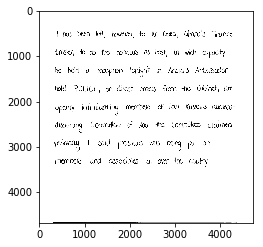

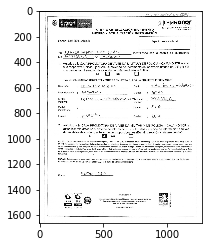

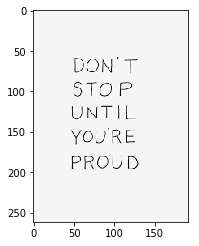

In [20]:
mostrar_imgs(images,3)
#pd.DataFrame(mostrar_imgs(images,2))

### Escala de grises y binarización

In [28]:
def escybin(images):
    cant=len(images)
    vect=[]
    for img in images:
        imgP = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #Desenfoque Gaussiano
        imgP = cv2.GaussianBlur(imgP, (5,5),0)
        #Umbral simple
        y = cv2.threshold(imgP, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)
        imgP = y[1]
        vect.append(imgP)
             
    return vect

In [29]:
pre = escybin(images)

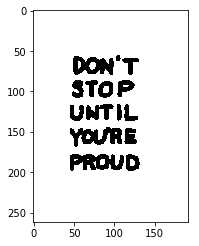

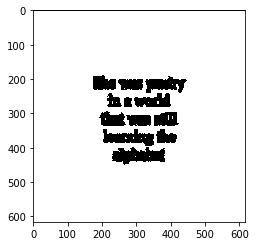

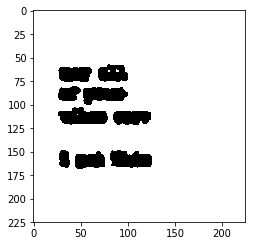

In [30]:
mostrar_imgs(pre,3)

### Contornos

In [31]:
def contornos(images):
    cant=len(images)
    vect=[]
    for i in range(0,len(images)):
        contornos, jerarquía = cv2.findContours (pre[i], cv2. RETR_TREE , cv2. CHAIN_APPROX_SIMPLE )
        imgP = cv2.drawContours(images[i], contornos, -1, (0, 0, 255), 2, cv2.LINE_AA)
        vect.append(imgP)
             
    return vect

In [ ]:
##
#def _find_page_contours(edges, img):
    """Finding corner points of page contour."""
    im2, contours, hierarchy = cv2.findContours(edges,
                                                cv2.RETR_TREE,
                                                cv2.CHAIN_APPROX_SIMPLE)
    
    # Finding biggest rectangle otherwise return original corners
    height = edges.shape[0]
    width = edges.shape[1]
    MIN_COUNTOUR_AREA = height * width * 0.5
    MAX_COUNTOUR_AREA = (width - 10) * (height - 10)

    max_area = MIN_COUNTOUR_AREA
    page_contour = np.array([[0, 0],
                             [0, height-5],
                             [width-5, height-5],
                             [width-5, 0]])

    for cnt in contours:
        perimeter = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.03 * perimeter, True)

        # Page has 4 corners and it is convex
        if (len(approx) == 4 and
                cv2.isContourConvex(approx) and
                max_area < cv2.contourArea(approx) < MAX_COUNTOUR_AREA):
            
            max_area = cv2.contourArea(approx)
            page_contour = approx[:, 0]

    # Sort corners and offset them
    page_contour = _four_corners_sort(page_contour)
    return _contour_offset(page_contour, (-5, -5))

In [32]:
contornos = contornos(images)

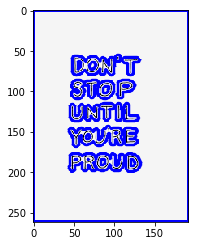

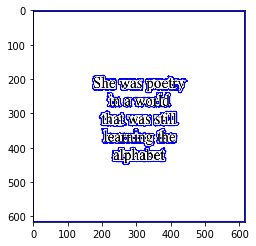

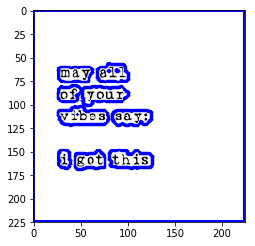

In [33]:
mostrar_imgs(contornos,3)

### Extracción de texto

In [21]:
custom_oem_psm_config = r'--oem 3 --psm 6'
def texto(images):
    cant=len(images)
    vect=[]
    text = []
    for i in range(0,cant):
        vect.append(pytesseract.image_to_data(images[i], output_type=Output.DICT, config=custom_oem_psm_config))
        n_boxes = len(vect[i]['level'])
        for j in range(n_boxes):
            (x, y, w, h) = (vect[i]['left'][j], vect[i]['top'][j], vect[i]['width'][j], vect[i]['height'][j])
            y = cv2.rectangle(images[i], (x, y), (x + w, y + h), (0, 255, 0), 2)
        text.append(vect[i]['text'])    
    return text

In [22]:
textos = texto(images)

In [23]:
def mostrar_extraer(images,text,cant):
    
    for i in range(0,cant):
        plt.figure(figsize=(10, 3.6))
        plt.subplot(1,cant,i+1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,right=0.99)
        resultado=plt.show()
        print(textos[i])

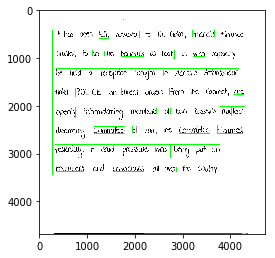

['', '', '', '', 'Ir', 'has', 'been', 'left,', 'however,', 'to', 'Hy.', 'Goka,', "Ghana's", 'Tirance', '', 'urusis,', 'to', 'do', 'the', 'honouss', 'aS', 'host,', 'i', 'wich', 'cagaaty', '', 'he', 'held', 'a', 'recephon', 'torught', 'in', 'Accra’s', 'Ambassador', '', 'Hokl.', 'POLICE,', 'on', 'direct', 'ordefs', 'from', 'the', 'Cabinet,', 'are', '', 'openly', 'inhmudating', 'members', 'of', 'tarl', "fusel's", '(uc', 'leas-', '', 'disarming', 'Commute', 'of', 'joo,', 'tne', 'Commies', 'clauned', '', 'yesterday.', 't', 'Sid', 'presse', 'wos', 'bang', 'put', 'on', '', 'membes', 'and', 'assouoks', 'all', 'over', 'the', 'Ccoulry.']


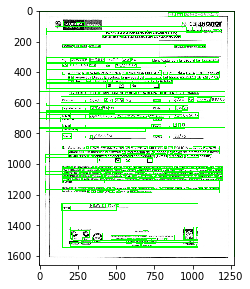

['', '', '', '', 'a', 'a', 'a', 'aa', 'a', 'Rl', 'a', '”’', '', '64~', 'of-', '2019030', 'YO3576', '', '‘', 'rr', 'Cee', 'A', '', '|', 'P', 'Fecha', 'aprobaién:', '20422018', '/', 'Versi:', '002', '', '|', 'FORMATO', 'AUTORIZACION', 'INCREMENTO', 'CbaIaST', 'SHATNER,', '', 'AHORRO', 'Y', 'ACTUALIZACION', 'INFORMACION', '', 'Fecha:', 'OW-', 'M08', '-', '20/44', 'Espacio', 'reservado', 'ticket', '', '', '|', 'Yo,', 'BRRYAY', 'AeVES', 'oho', 'Ewa', 'de', 'identificado', 'con', 'la', 'cédula', 'de', 'ciudadania', '', '', '|', 'No.', '4G', '44204', 'B04', 'de', 'MEDENVWN', ',', '', '', '|', '—', '', '', 'i', 'A', '', '', '|', '1.', 'Autorizo', 'ala', 'CAJA', 'PROMOTORA', 'DE', 'VIVIENDA', 'MILITAR', 'Y', 'DE', 'POLICIA-', 'CAJA', 'HONOR', 'enviar', '', '', '|', 'a', 'la', 'respectiva', 'Unidad', 'Ejecutora,', 'la', 'novedad', 'de', 'incremento', 'del', 'ahorro', 'voluntario', 'del', '2%', 'y/o', '3%', '', '', '|', 'con', 'destino', 'a', 'mi', 'solucién', 'de', 'vivienda', 'por', 'intermedio

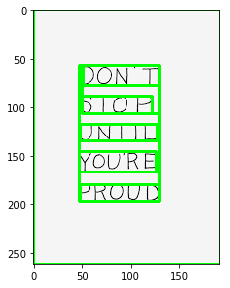

['', '', '', '', "DON'T", '', 'S10', '', '', 'UNTIL', '', "YOU'RE", '', 'PROUD']


In [24]:
mostrar_extraer(images,textos,3)

In [15]:
def guardar_img(images):
   path ='C:/Users/laorozco/Desktop/res/'
   i=0
   for img in images:
       cv2.imwrite(os.path.join(path ,str(i)+'.jpg'), img)
       i=i+1

In [25]:
guardar_img(images)